Title: Customer Churn Prediction for a Telecommunications Company

Dataset Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Data Visualization and Exploration 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('Telco_customer.csv') #Loading the dataset
#Data exploration options to visualize the structure,datatypes enclosed.
data.head()   

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [41]:
print("Missing values:\n", data.isnull().sum()) #Checking the presence of missing values in Dataset

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


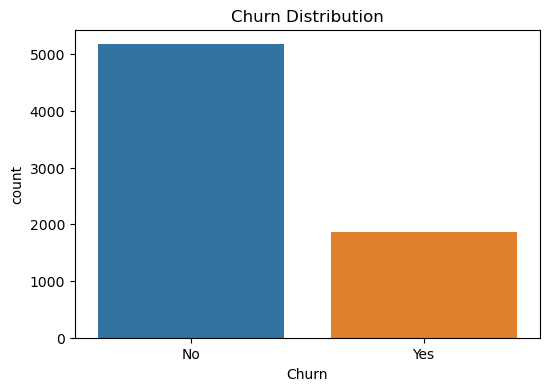

In [31]:
#checking the distribution of target variable 
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

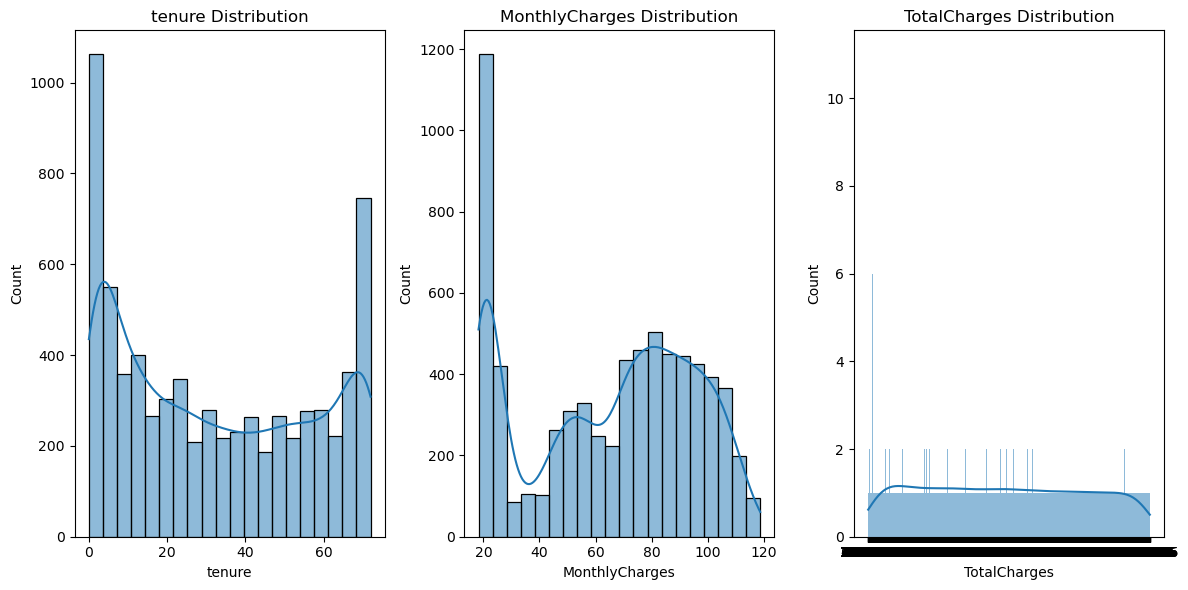

In [32]:
#Analysis of the distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

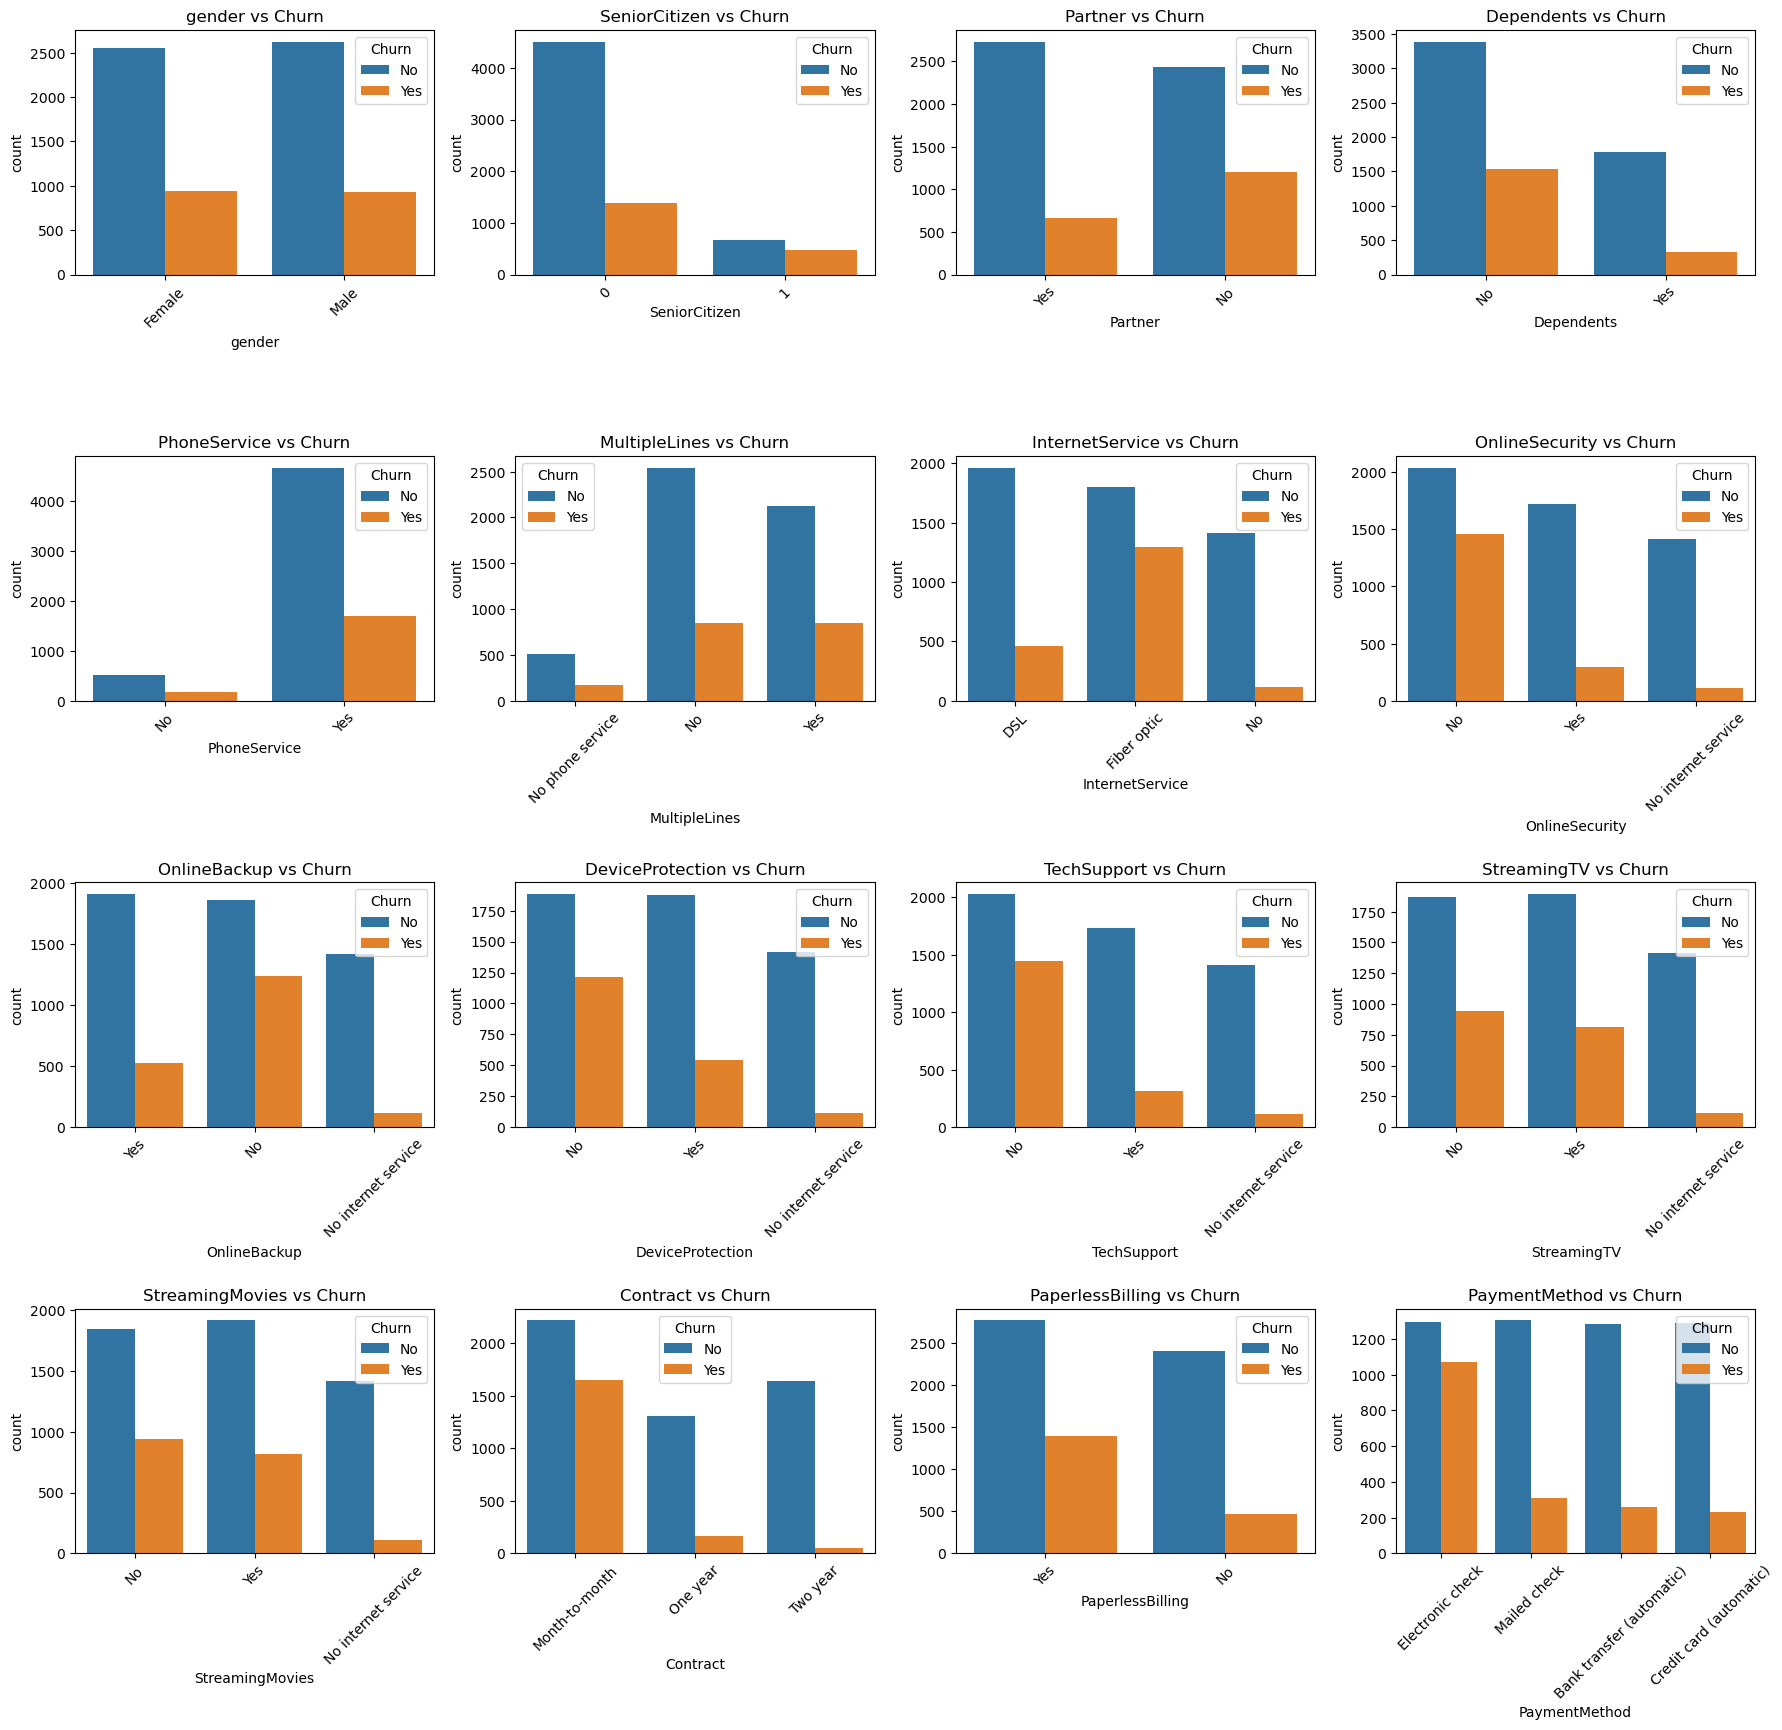

In [33]:
# Exploring the distribution of categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
plt.figure(figsize=(18, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=feature, data=data, hue='Churn')
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data Preprocessing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [42]:
#Dropping the irrelevant data such as CustomerID 
data.drop(['customerID'], axis=1, inplace=True)
#Converting Yes and No variables to binary form
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']
data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0})
#Converting Yes and No variables to binary form
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
label_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
#Mapping other categorical variables using Label Encoder
label_encoder = LabelEncoder()
for col in label_columns:
    data[col] = label_encoder.fit_transform(data[col])
#Engineering a sample feature to add more dimesionality 
data['MonthlyChargesToTenureRatio'] = data['MonthlyCharges'] / (data['tenure'].replace(0, 1))


In [43]:
#Performing feature Scaling on numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [44]:
#splitting the data into features X and target Y
X = data.drop('Churn', axis=1)
y = data['Churn']
# Splitting the data into training and testing sets  70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Machine Learning Model Selection

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


Tuning Logistic Regression Model 

In [62]:
from sklearn.linear_model import LogisticRegression

In [69]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],       
    'solver': ['liblinear']         
}
logistic_model=LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_logistic_model = LogisticRegression(random_state=42, **best_params)
best_logistic_model.fit(X_train, y_train)
y_pred = best_logistic_model.predict(X_test)

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [70]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1])
print(accuracy)
print(precision)
print(recall)
print(f1)
print(roc_auc)

0.8116422148603881
0.6904761904761905
0.5557491289198606
0.6158301158301158
0.861078848883727


Random Forest Classifier and Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


Model: Random Forest
Accuracy: 0.7974
Precision: 0.6834
Recall: 0.4739
F1 Score: 0.5597
ROC AUC: 0.8339
Model: Gradient Boosting
Accuracy: 0.8003
Precision: 0.6704
Recall: 0.5209
F1 Score: 0.5863
ROC AUC: 0.8557


Tuning Random Forest Classifier 

In [72]:
param_grid = {
    'n_estimators': [50, 100, 150],          
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['sqrt', 'log2']  
}

random_forest_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_random_forest_model = RandomForestClassifier(random_state=42, **best_params)
best_random_forest_model.fit(X_train, y_train)

y_pred = best_random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_random_forest_model.predict_proba(X_test)[:, 1])

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.8003
Precision: 0.6818
Recall: 0.4965
F1 Score: 0.5746
ROC AUC: 0.8556


Tuning Gradient Boosting Classifier 

In [73]:
param_grid = {
    'n_estimators': [50, 100, 150],       
    'learning_rate': [0.01, 0.1, 0.2],    
    'max_depth': [3, 5, 7],               
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],        
    'subsample': [0.8, 1.0]               
}


gb_model = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_gb_model = GradientBoostingClassifier(random_state=42, **best_params)
best_gb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}
Test Accuracy: 0.8027
Precision: 0.6856
Recall: 0.5052
F1 Score: 0.5817
ROC AUC: 0.8579


Tuning XGBoost using Randomized Search to combat with computational cost

In [77]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


In [79]:
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2],   
    'max_depth': [3, 5, 7],              
    'n_estimators': [50, 100, 150],      
    'subsample': [0.8, 1.0],             
    'colsample_bytree': [0.8, 1.0],     
}


xgb_model =xgb.XGBClassifier(random_state=42)


random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions,
                                   n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_model =xgb.XGBClassifier(random_state=42, **best_params)
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Test Accuracy: 0.8003
Precision: 0.6818
Recall: 0.4965
F1 Score: 0.5746
ROC AUC: 0.8569
